In [80]:
class_list = ["수치해석", "헬스케어", "딥러닝"]
student1 = []
def add_class1(class_name):
    global student1
    student1.append(class_name)

add_class1(class_list[0])
add_class1(class_list[1])
student1

['수치해석', '헬스케어']

In [68]:
student2 = []
def add_class2(class_name):
    global student2
    student2.append(class_name)
add_class2(class_list[0])
add_class2(class_list[2])
student2

['수치해석', '딥러닝']

In [69]:
class Student():
    def __init__(self):
        self.class_ = []

    def add_class(self, class_name):
        self.class_.append(class_name)
student1 = Student()
student2 = Student()

student1.add_class(class_list[0])
student1.add_class(class_list[1])
student2.add_class(class_list[0])
student2.add_class(class_list[2])

student1.class_, student2.class_

(['수치해석', '헬스케어'], ['수치해석', '딥러닝'])

In [70]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def print_info(self):
        print(f"name: {self.name}\nage: {self.age}")
        
class Student(Person):
    def __init__(self, name, age, major, semester):
        super().__init__(name, age)
        self.major = major
        self.semester = semester
        self.set_info()
        self.class_ = []
        
    def set_info(self):
        self.grade = self.semester // 2
        
    def add_class(self, class_name):
        self.class_.append(class_name)
        
    def print_info(self):
        super().print_info()
        print(f"major: {self.major}\nsemester: {self.semester}\ngrade: {self.grade}")
        
    def print_class_info(self):
        print(f"Take {len(self.class_)} class(es)")
        for cidx, cname in enumerate(self.class_):
            print(f"{cidx+1:d}교시 {cname}")
        
        
class Professor(Person):
    def __init__(self, name, age, office):
        super().__init__(name, age)
        self.office = office
        self.lectures = {}
        
    def add_lecture(self, lecture_name, credit):
        self.lectures[lecture_name] = credit
        
    def print_info(self):
        super().print_info()
        print(f"{len(self.lectures)} 수업")
        
    def print_lecture_info(self):
        print(f"{len(self.lectures)} lecture(s)")
        for cidx, (lname, lcredit) in enumerate(self.lectures.items()):
            print(f"{lcredit}학점 {lname}")
         
        
        

In [75]:
st1 = Student("seongbeen", 26, "Mechanical Engineering Systems", 6)
st1.add_class(class_list[0])
st1.add_class(class_list[1])
st1.print_class_info(), st1.print_info()

Take 2 class(es)
1교시 수치해석
2교시 헬스케어
name: seongbeen
age: 26
major: Mechanical Engineering Systems
semester: 6
grade: 3


(None, None)

In [74]:
pf = Professor("심주용", 38, 314)
pf.add_lecture(class_list[0],3)
pf.add_lecture(class_list[1],3)
pf.print_lecture_info(), pf.print_info()

2 lecture(s)
3학점 수치해석
3학점 헬스케어
name: 심주용
age: 38
2 수업


(None, None)

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [78]:
import os
from PIL import Image
from glob import glob
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class MNIST(Dataset):
    def __init__(self, data_path="../Dataset/MNIST", train=True, device=None) -> None:
        super().__init__()
        self.train = train
        self.folder = "training" if self.train else "testing"
        self.shuffle = True if self.train else False
        self.data_path = f"{data_path}/{self.folder}"
        self.device = device
        self.load_data()
        
        self.data = self.data.to(self.device)
        self.targets = self.targets.to(self.device)
        print(f"load {len(self.data)} data for {self.folder}")
        
    def load_data(self):
        self.data = torch.empty(0)
        self.targets = torch.empty(0)
        for i in range(10):
            img_path = f"{self.data_path}/{i}/*.png"
            for idx, fname in enumerate(glob(img_path)):
                img = Image.open(fname)
                img_tensor = ToTensor()(img)[None, ...]
                label = torch.tensor([i])#[None, ...]
                self.data = torch.cat((self.data, img_tensor), dim=0)
                self.targets = torch.cat((self.targets, label), dim=0)
                
                if self.train and idx%5000==5000-1:
                    break 
#             print(f"load {len(self.data)} data")
                    
#                 if (not self.train) and idx%10==10-1:
#                     print(f"load {len(self.data)} data")
#                     break 
    
    def __len__(self) -> int:
        return len(self.data)
    
    def __getitem__(self, index: int):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], self.targets[index].to(dtype=torch.int64)
        return img, target

In [47]:
vis_dataset = MNIST(train=False, device=device)

load 10 data
load 20 data
load 30 data
load 40 data
load 50 data
load 60 data
load 70 data
load 80 data
load 90 data
load 100 data
load 100 data for testing


In [79]:
train_dataset = MNIST(train=True, device=device)
valid_dataset = MNIST(train=False, device=device)

KeyboardInterrupt: 

In [5]:
batch_size = 512*2
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size = batch_size, shuffle=False)

In [6]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
model = NeuralNetwork().to("cuda")
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


<a href="https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html">Cross Entropy Loss</a>

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss = 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         if batch % 100 == 0:
#             loss, current = loss.item(), (batch + 1) * len(X)
#             print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    train_loss /= num_batches
    return train_loss

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

Epoch 1
-------------------------------
Test Error: Accuracy: 22.0%, Avg loss: 2.279830 

Epoch 2
-------------------------------
Test Error: Accuracy: 33.0%, Avg loss: 2.254892 

Epoch 3
-------------------------------
Test Error: Accuracy: 44.8%, Avg loss: 2.225021 

Epoch 4
-------------------------------
Test Error: Accuracy: 53.9%, Avg loss: 2.186999 

Epoch 5
-------------------------------
Test Error: Accuracy: 60.9%, Avg loss: 2.136715 

Epoch 6
-------------------------------
Test Error: Accuracy: 66.5%, Avg loss: 2.068906 

Epoch 7
-------------------------------
Test Error: Accuracy: 70.3%, Avg loss: 1.977871 

Epoch 8
-------------------------------
Test Error: Accuracy: 73.2%, Avg loss: 1.859119 

Epoch 9
-------------------------------
Test Error: Accuracy: 75.9%, Avg loss: 1.712872 

Epoch 10
-------------------------------
Test Error: Accuracy: 77.7%, Avg loss: 1.546798 

Epoch 11
-------------------------------
Test Error: Accuracy: 79.2%, Avg loss: 1.375607 

Epoch 12

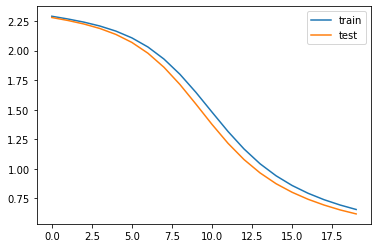

Epoch 21
-------------------------------
Test Error: Accuracy: 85.7%, Avg loss: 0.588520 

Epoch 22
-------------------------------
Test Error: Accuracy: 86.1%, Avg loss: 0.563222 

Epoch 23
-------------------------------
Test Error: Accuracy: 86.6%, Avg loss: 0.541878 

Epoch 24
-------------------------------
Test Error: Accuracy: 87.0%, Avg loss: 0.521175 

Epoch 25
-------------------------------
Test Error: Accuracy: 87.3%, Avg loss: 0.504912 

Epoch 26
-------------------------------
Test Error: Accuracy: 87.6%, Avg loss: 0.489730 

Epoch 27
-------------------------------
Test Error: Accuracy: 87.7%, Avg loss: 0.475483 

Epoch 28
-------------------------------
Test Error: Accuracy: 88.0%, Avg loss: 0.464103 

Epoch 29
-------------------------------
Test Error: Accuracy: 88.2%, Avg loss: 0.453670 

Epoch 30
-------------------------------
Test Error: Accuracy: 88.3%, Avg loss: 0.443013 

Epoch 31
-------------------------------
Test Error: Accuracy: 88.6%, Avg loss: 0.433781 


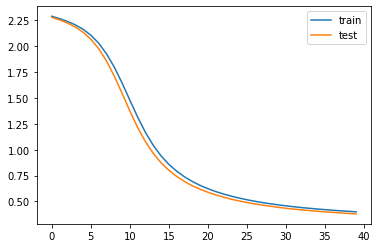

Epoch 41
-------------------------------
Test Error: Accuracy: 89.5%, Avg loss: 0.375341 

Epoch 42
-------------------------------
Test Error: Accuracy: 89.6%, Avg loss: 0.371141 

Epoch 43
-------------------------------
Test Error: Accuracy: 89.7%, Avg loss: 0.367435 

Epoch 44
-------------------------------
Test Error: Accuracy: 89.8%, Avg loss: 0.363918 

Epoch 45
-------------------------------
Test Error: Accuracy: 89.8%, Avg loss: 0.360681 

Epoch 46
-------------------------------
Test Error: Accuracy: 89.9%, Avg loss: 0.357796 

Epoch 47
-------------------------------
Test Error: Accuracy: 89.9%, Avg loss: 0.355177 

Epoch 48
-------------------------------
Test Error: Accuracy: 90.1%, Avg loss: 0.350873 

Epoch 49
-------------------------------
Test Error: Accuracy: 90.1%, Avg loss: 0.348040 

Epoch 50
-------------------------------
Test Error: Accuracy: 90.3%, Avg loss: 0.345729 

Epoch 51
-------------------------------
Test Error: Accuracy: 90.2%, Avg loss: 0.343335 


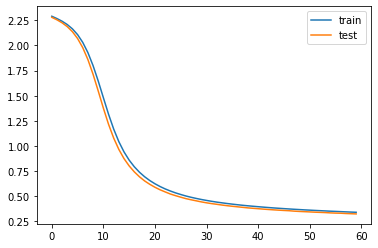

Epoch 61
-------------------------------
Test Error: Accuracy: 90.7%, Avg loss: 0.321506 

Epoch 62
-------------------------------
Test Error: Accuracy: 90.8%, Avg loss: 0.319168 

Epoch 63
-------------------------------
Test Error: Accuracy: 90.9%, Avg loss: 0.317613 

Epoch 64
-------------------------------
Test Error: Accuracy: 91.0%, Avg loss: 0.315452 

Epoch 65
-------------------------------
Test Error: Accuracy: 90.9%, Avg loss: 0.314901 

Epoch 66
-------------------------------
Test Error: Accuracy: 91.1%, Avg loss: 0.312594 

Epoch 67
-------------------------------
Test Error: Accuracy: 91.1%, Avg loss: 0.310662 

Epoch 68
-------------------------------
Test Error: Accuracy: 91.2%, Avg loss: 0.308839 

Epoch 69
-------------------------------
Test Error: Accuracy: 91.1%, Avg loss: 0.308527 

Epoch 70
-------------------------------
Test Error: Accuracy: 91.2%, Avg loss: 0.306607 

Epoch 71
-------------------------------
Test Error: Accuracy: 91.3%, Avg loss: 0.304782 


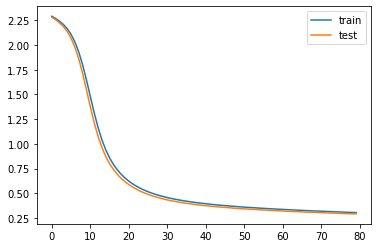

Epoch 81
-------------------------------
Test Error: Accuracy: 91.7%, Avg loss: 0.291371 

Epoch 82
-------------------------------
Test Error: Accuracy: 91.8%, Avg loss: 0.289447 

Epoch 83
-------------------------------
Test Error: Accuracy: 91.8%, Avg loss: 0.288632 

Epoch 84
-------------------------------
Test Error: Accuracy: 91.8%, Avg loss: 0.287021 

Epoch 85
-------------------------------
Test Error: Accuracy: 91.9%, Avg loss: 0.286124 

Epoch 86
-------------------------------
Test Error: Accuracy: 91.9%, Avg loss: 0.284402 

Epoch 87
-------------------------------
Test Error: Accuracy: 91.9%, Avg loss: 0.283699 

Epoch 88
-------------------------------
Test Error: Accuracy: 92.0%, Avg loss: 0.282579 

Epoch 89
-------------------------------
Test Error: Accuracy: 92.0%, Avg loss: 0.280693 

Epoch 90
-------------------------------
Test Error: Accuracy: 92.0%, Avg loss: 0.279666 

Epoch 91
-------------------------------
Test Error: Accuracy: 92.1%, Avg loss: 0.278995 


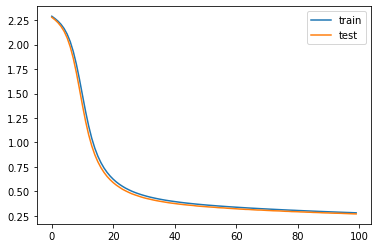

Done!


In [10]:
learning_rate = 1e-2
epochs = 100
loss_fn = nn.CrossEntropyLoss()
model = NeuralNetwork().to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
monitor = 20
corrects = []
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_loader, model, loss_fn, optimizer)
    correct, test_loss = test_loop(valid_loader, model, loss_fn)
    corrects.append(correct)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if t%monitor==monitor-1:
        plt.plot(train_losses, label="train")
        plt.plot(test_losses, label="test")
        plt.legend()
        plt.show()
        plt.close()
    
print("Done!")

Epoch 1
-------------------------------
Test Error: Accuracy: 91.8%, Avg loss: 0.283487 

Epoch 2
-------------------------------
Test Error: Accuracy: 94.2%, Avg loss: 0.201751 

Epoch 3
-------------------------------
Test Error: Accuracy: 95.6%, Avg loss: 0.153939 

Epoch 4
-------------------------------
Test Error: Accuracy: 96.3%, Avg loss: 0.123540 

Epoch 5
-------------------------------
Test Error: Accuracy: 96.8%, Avg loss: 0.110793 

Epoch 6
-------------------------------
Test Error: Accuracy: 97.2%, Avg loss: 0.092959 

Epoch 7
-------------------------------
Test Error: Accuracy: 97.3%, Avg loss: 0.091034 

Epoch 8
-------------------------------
Test Error: Accuracy: 97.7%, Avg loss: 0.081011 

Epoch 9
-------------------------------
Test Error: Accuracy: 97.6%, Avg loss: 0.081063 

Epoch 10
-------------------------------
Test Error: Accuracy: 97.6%, Avg loss: 0.075835 

Epoch 11
-------------------------------
Test Error: Accuracy: 97.7%, Avg loss: 0.075465 

Epoch 12

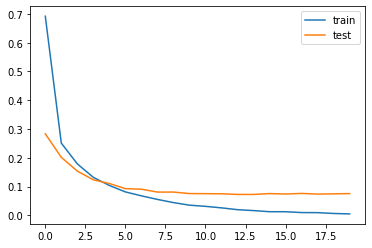

Epoch 21
-------------------------------
Test Error: Accuracy: 97.9%, Avg loss: 0.080264 

Epoch 22
-------------------------------
Test Error: Accuracy: 97.9%, Avg loss: 0.077419 

Epoch 23
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.077539 

Epoch 24
-------------------------------
Test Error: Accuracy: 97.9%, Avg loss: 0.079117 

Epoch 25
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.080411 

Epoch 26
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.080258 

Epoch 27
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.079470 

Epoch 28
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.081545 

Epoch 29
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.081538 

Epoch 30
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.082625 

Epoch 31
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.083434 


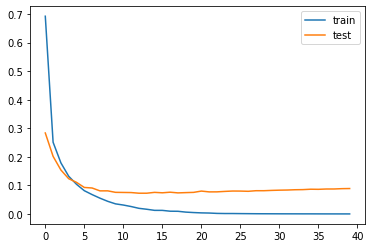

Epoch 41
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.089983 

Epoch 42
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.089868 

Epoch 43
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.091182 

Epoch 44
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.090925 

Epoch 45
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.091983 

Epoch 46
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.092701 

Epoch 47
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.093037 

Epoch 48
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.093221 

Epoch 49
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.093679 

Epoch 50
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.094052 

Epoch 51
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.094734 


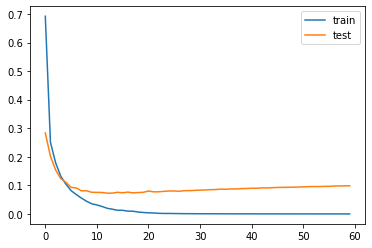

Epoch 61
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.099061 

Epoch 62
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.099127 

Epoch 63
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.099706 

Epoch 64
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.100393 

Epoch 65
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.100761 

Epoch 66
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.100753 

Epoch 67
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.101061 

Epoch 68
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.101662 

Epoch 69
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.102095 

Epoch 70
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.102168 

Epoch 71
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.102862 


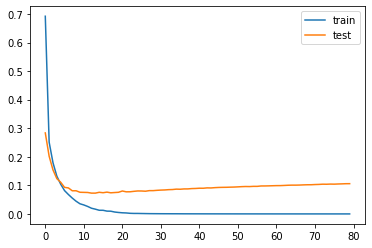

Epoch 81
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.106413 

Epoch 82
-------------------------------
Test Error: Accuracy: 98.0%, Avg loss: 0.106567 

Epoch 83
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.106771 

Epoch 84
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.107370 

Epoch 85
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.107655 

Epoch 86
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.108063 

Epoch 87
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.108321 

Epoch 88
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.108842 

Epoch 89
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.109194 

Epoch 90
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.109092 

Epoch 91
-------------------------------
Test Error: Accuracy: 98.1%, Avg loss: 0.110036 


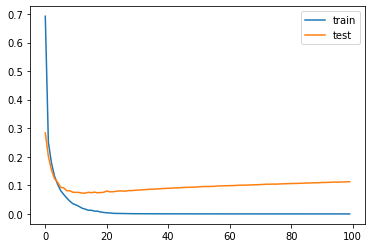

Done!


In [13]:
learning_rate = 0.001
epochs = 100
loss_fn = nn.CrossEntropyLoss()
model = NeuralNetwork().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
monitor = 20
corrects = []
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_loader, model, loss_fn, optimizer)
    correct, test_loss = test_loop(valid_loader, model, loss_fn)
    corrects.append(correct)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if t%monitor==monitor-1:
        plt.plot(train_losses, label="train")
        plt.plot(test_losses, label="test")
        plt.legend()
        plt.show()
        plt.close()
    
print("Done!")

## Save checkpoint option1

In [26]:
os.mkdir("ckpts1")

In [28]:
learning_rate = 0.001
epochs = 100
loss_fn = nn.CrossEntropyLoss()
model = NeuralNetwork().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
monitor = 20
corrects = []
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_loader, model, loss_fn, optimizer)
    correct, test_loss = test_loop(valid_loader, model, loss_fn)
    corrects.append(correct)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if t%monitor==monitor-1:
        plt.plot(train_losses, label="train")
        plt.plot(test_losses, label="test")
        plt.legend()
        plt.show()
        plt.close()
    torch.save(model.state_dict(),f"./ckpts1/{t:03d}.pth")
    break
    
print("Done!")

Epoch 1
-------------------------------
Test Error: Accuracy: 92.2%, Avg loss: 0.284396 

Done!


option2

## Save checkpoint option2

In [26]:
os.mkdir("ckpts2")

In [34]:
learning_rate = 0.001
epochs = 100
loss_fn = nn.CrossEntropyLoss()
model = NeuralNetwork().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
monitor = 20
corrects = []
train_losses = []
test_losses = []
min_loss = torch.tensor(float('inf')).cuda()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_loader, model, loss_fn, optimizer)
    correct, test_loss = test_loop(valid_loader, model, loss_fn)
    corrects.append(correct)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if t%monitor==monitor-1:
        plt.plot(train_losses, label="train")
        plt.plot(test_losses, label="test")
        plt.legend()
        plt.show()
        plt.close()
    if min_loss>test_loss:
        min_loss = test_loss
        print("save")
        torch.save(model.state_dict(),f"./ckpts2/best.pth")
    
print("Done!")

Epoch 1
-------------------------------
Test Error: Accuracy: 91.4%, Avg loss: 0.293168 

save
Epoch 2
-------------------------------
Test Error: Accuracy: 93.6%, Avg loss: 0.207785 

save
Epoch 3
-------------------------------
Test Error: Accuracy: 95.3%, Avg loss: 0.161603 

save
Epoch 4
-------------------------------
Test Error: Accuracy: 95.5%, Avg loss: 0.139862 

save
Epoch 5
-------------------------------
Test Error: Accuracy: 96.3%, Avg loss: 0.124156 

save
Epoch 6
-------------------------------


KeyboardInterrupt: 

## Visualize

In [ ]:
eval_model = NeuralNetwork().to(device)
eval_model.load_state_dict(torch.load("./ckpts2/best.pth"))

In [ ]:
eval_model.eval()
vis_loader = DataLoader(vis_dataset, batch_size = batch_size, shuffle=False)
with torch.no_grad():
    for img, target in vis_loader:
        break
    out = eval_model(img)

In [ ]:
plt.figure(figsize=(13,13))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(img[i].permute(1,2,0).cpu().detach())
    plt.title(f"{target[i].item()},{torch.argmax(out[i]).item()}")
    plt.tight_layout()
    plt.axis("off")
plt.show()
plt.close()